<a href="https://colab.research.google.com/github/good0neighbour/ESTCampAI/blob/main/Deeplearning/YOLO01_YOLO_%EA%B8%B0%EC%B4%88(%EC%9D%8C%EC%8B%9D%EC%82%AC%EC%A7%84_%EB%B6%84%EB%A5%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## YOLO (You Only Look Once)
- Ultralytics 사에서 만든 YOLO라는 모델
- 객체 탐지, 분류, 세그멘테이션, 오픈포즈 등 다양한 Task 지원 가능
- 실시간 객체탐지 기술의 대명사와도 같은 딥러닝 모델

> 시각지능의 발전단계
> 1. 분류
> 2. 객체탐지 (분류 + Localization)
> 3. 세그멘테이션

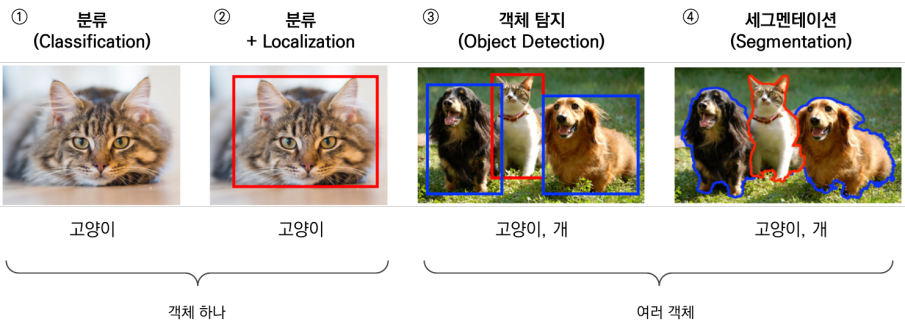

### YOLO Task 종류 및 크기별 특징

- 종류
  - 기본 : Detection(객체 탐지), `yolo11n.pt`
  - 세그멘테이션 : Segmentation, `yolo11n-seg.pt`
  - 포즈추정 : OpenPose(키포인트 탐지), `yolo11n-pose.pt`
  - obb : 객체 방향에 맞춰 기울어진 박스로 예측, `yolo11n-obb.pt`
  - 분류 : 이미지 분류, `yolo11n-cls.pt`

| 모델 크기 | 특징                                | 장점                                       | 단점                                          | 사용 예시                           |
|:-------:|:--------------------------------:|:----------------------------------------:|:--------------------------------------------:|:----------------------------------:|
| **n (nano)**  | 가장 작은 모델                   | - 파라미터 수가 적어 **경량화**<br>- **추론 속도**가 매우 빠름 | - 정확도가 상대적으로 낮을 수 있음             | - 임베디드 장치, 모바일 환경<br>- **실시간** 처리 요구 상황 |
| **s (small)** | 작은 모델                      | - nano보다 조금 더 **성능 향상**<br>- 여전히 가볍고 빠름 | - 정확도와 속도 면에서 **중간 정도**의 타협점      | - 모바일/PC 혼합 환경<br>- 경량 모델 필요하지만 **정확도**도 어느 정도 필요한 경우 |
| **m (medium)**| 중간 크기 모델                   | - **추론 속도**와 **정확도**의 균형<br>- 범용성 높음 | - nano·small에 비해 자원 요구량이 늘어남          | - 일반적인 PC 환경<br>- 실시간 또는 준실시간 처리 |
| **l (large)** | 큰 모델                        | - 더 많은 파라미터로 **정확도 향상**<br>- 복잡한 문제에도 강함 | - 추론 속도가 느려질 수 있음<br>- 고성능 GPU가 필요 | - 서버/클라우드 환경<br>- 정확도 우선 과제 (ex. 정밀 객체 탐지) |
| **x (extra-large)** | 가장 큰 모델              | - **최고 수준의 정확도** 추구<br>- 매우 풍부한 표현력 | - 학습 및 추론 시간이 오래 걸림<br>- **메모리 사용량** 많음 | - 대규모 서버/클라우드 환경<br>- 정밀도가 최우선인 프로젝트 |

### YOLO 이론 (원리)

#### 1. YOLO 모델 이전의 객체 탐지
<img src = "https://drive.google.com/uc?id=1OlIqARm3_i7rCNcyNoVJ-K9W4qGrChmb">

##### 2. YOLO 모델 등장
<img src = "https://drive.google.com/uc?id=19hIMvf-lhK28O4W4BHGsZsSBlOziTzW6">

#### 3. YOLO 모델 원리 1
<img src = "https://drive.google.com/uc?id=1GIdjkTb0fPGXcnC4pwqgtXpgxApQbUqC">

#### 4. YOLO 모델 원리 2
<img src = "https://drive.google.com/uc?id=1NBYJciby6BLgXzQUC1OmLctQ88uBQCzr">

#### 5. Google Net 기반
<img src = "https://drive.google.com/uc?id=1SD3DOmBtuUtRhzBZiVUdOs2oGZmgzdO8">

#### 6. YOLO 아키텍처
<img src = "https://drive.google.com/uc?id=1WoJ7K1ibeVw6R0EZJC8F1EtRCoIuoHIL">

#### 7. YOLO Training
<img src = "https://drive.google.com/uc?id=17iVynJ5ytP1jEXuxTOGMmmAxarp565l2">

#### 8. YOLO Loss Function
<img src = "https://drive.google.com/uc?id=1scMPDDPo9ERQMMlIwUL_nD3se18O2HOm">

#### 9. 논문에서 사용된 하이퍼파라미터
<img src = "https://drive.google.com/uc?id=1qPD6jIVVOqVtBv9Asm_mL8OSW9o732mz">

### 학습목표
- 음식 사진을 보고 종류를 분류하는 YOLO 모델 만들기

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
%cd /content/drive/MyDrive/ESTCampAI/Deeplearning

### Kaggle에서 원하는 데이터 지정해서 다운로드 받기

```python
# zip 명령어 사용 전, 상대경로 설정을 위해서 이미지 디렉토리로 이동
%cd /kaggle/input/food41/images

# zip 명령어
# -r : 하위 폴더&파일까지 하나의 zip으로 생성
!zip -r /kaggle/working/food.zip apple_pie donuts hamburger onion_rings pizza
```

In [ ]:
# 압축 풀기
!unzip ./data/food.zip -d ./data/food/

### YOLO 폴더 구조 준비
- YOLO는 Task 별로 전이학습 시, 필요한 폴더구조를 기대하고 있음
- 훈련용, 평가용, 검증용


In [ ]:
import os

In [ ]:
# 폴더 생성하기
if not os.path.exists("./data/food_for_yolo") : # 폴더가 없는 경우
  os.mkdir("./data/food_for_yolo")              # 루트폴더 생성

In [ ]:
# 루트폴더의 하위 폴더였던 train, test, val 폴더 생성
for folder in ["train", "test", "val"] :
  os.makedirs(f"./data/food_for_yolo/{folder}", exist_ok = True)
  # exist_ok : 동일한 이름의 폴더가 이미 존재해도 오류를 발생하지 않겠다

In [ ]:
# train, test, val의 하위 폴더 생성

# 클래스명 (음식 이름) 가져오기 - 폴더명 가져오기
food_list = os.listdir("./data/food") # unzip 해놨던 폴더명

# train, test, val 경로 담아두기
folder_list = [f"./data/food_for_yolo/{folder}" for folder in os.listdir("./data/food_for_yolo")]

In [ ]:
# 각각의 train, test, val에 클래스명으로 폴더 생성해주기
for folder_path in folder_list :
  for food in food_list :
    os.makedirs(folder_path + "/" + food, exist_ok = True)

In [ ]:
import shutil # 파일에 대해 여러가지 고수준 연산을 제공

In [ ]:
# 각각의 푸드에 대한 이미지 파일명 접근
food_fn = [os.listdir(f"./data/food/{food}/") for food in food_list]

In [ ]:
print(len(food_fn))
print(len(food_fn[0])) # 이미지는 총 1000장

# train 640, test 160, val 200

In [ ]:
# 사진 이동시키기 (food 안에 있는 이미지 → 각각의 train/test/val에 옮겨주기)

for food, img_list in zip(food_list, food_fn) :
  # train에 옮기기
  # shutil.move(옮겨질 파일경로, 최종적으로 옮겨둘 파일경로)
  for img_name in img_list[:640] :
    shutil.move(
        "./data/food/" + food + "/" + img_name,
        folder_list[0] + "/" + food + "/" + img_name
    )

  # test에 옮기기
  for img_name in img_list[640:800] :
    shutil.move(
        "./data/food/" + food + "/" + img_name,
        folder_list[1] + "/" + food + "/" + img_name
    )

  # val에 옮기기
  for img_name in img_list[800:] :
    shutil.move(
        "./data/food/" + food + "/" + img_name,
        folder_list[2] + "/" + food + "/" + img_name
    )

## YOLOv11 학습

In [ ]:
!pip -q install ultralytics

In [ ]:
# 욜로 클래스 로드
from ultralytics import YOLO

In [ ]:
# 미리 학습 된 모델 가중치 파일을 이용해서 YOLO 모델 초기화
model = YOLO("./data/yolo11n-cls.pt")

In [ ]:
# 준비된 데이터셋 기반으로 파인튜닝 실행
results = model.train(
    data = "./data/food_for_yolo/",
    epochs = 20,
    imgsz = 224,
    batch = 64,
    patience = 3,
    lr0 = 0.0005 # 초기학습률 설정 (기본값은 0.01)
)

In [ ]:
# YOLO가 저장한 혼돈행렬 확인해보기
from PIL import Image

Image.open("./runs/classify/train/confusion_matrix.png")

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 12))
plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
# 검증
model.val(data = "./data/food_for_yolo", split = "val", imgsz = 224, batch = 64)

In [ ]:
# 사진 1장 예측해보기
rs = model("./data/food_for_yolo/test/pizza/1143057.jpg")

In [ ]:
# 사진 여러장 예측해보기
rs = model("./data/food_for_yolo/test/pizza")